<h1><center><strong><font color="chillipepper">Lab Session 2: Word Embeddings and their Evaluation</font></strong></center></h1>
<h3><center><font color="blue"><strong>Student Version</strong></font></center></h3>

------------------------

In this session we will use the following corpora to train embeddings: 
- A political media corpus, consisting of tweets from politicians
- Economical news
- A corpus containing stories of films from the IMDB
- A corpus containing human-rated similarities

Tips: 
- <font color="green">Follow the **TODO** indication (check the table of content on the left side of the interface);
- Follow the tips;
- Use the output as indication when an output is given</font>

### 1. Write **a function that cleans** a given text, i.e :
 - Lower-case the text
 - Tokenizes
 - Separates sentences
 - Detects multi-word expressions (i.e. "New", York" becomes "New York")

### 2. **Clean the 3 corpora** with your cleaning function. (1 corpus = 1 list of cleaned and tokenized sentences).

### 3. Create a **TF-IDF based Search Engine**

### 4. **Train a Word2Vec model** with Gensim for the 3 corpora, and explore the most similar words to "man", "woman", "politician', etc. for the corpora. 

### 5. **Export the embeddings** as two .tsv files to use projector.tensorflow.org interactive visualisation. 

### 6. Write an **evaluation function** that computes the correlation coefficient between human-rated similarity and Word2Vec's cosine similarity




# <font color="chillipepper">**Preparation**</font>

### Download the corpora
(can also be manually downloaded here: https://gitlab.com/gguibon/ensae-ml4nlp-storage/-/tree/master)

In [ ]:
! pip3 install datasets

     |████████████████████████████████| 311 kB 15.6 MB/s 
     |████████████████████████████████| 67 kB 4.6 MB/s 
     |████████████████████████████████| 243 kB 53.8 MB/s 
     |████████████████████████████████| 1.1 MB 26.5 MB/s 
     |████████████████████████████████| 133 kB 48.0 MB/s 
     |████████████████████████████████| 94 kB 2.9 MB/s 
     |████████████████████████████████| 144 kB 47.4 MB/s 
     |████████████████████████████████| 271 kB 52.5 MB/s 


In [ ]:
3# Downloads the different corpora (can also be manually downloaded here: https://gitlab.com/gguibon/ensae-ml4nlp-storage/-/tree/master)
! wget https://gitlab.com/gguibon/ensae-ml4nlp-storage/-/raw/master/Full-Economic-News-DFE-839861.csv
! wget https://gitlab.com/gguibon/ensae-ml4nlp-storage/-/raw/master/Political-media-DFE.csv
! wget https://gitlab.com/gguibon/ensae-ml4nlp-storage/-/raw/master/movies_metadata.csv
! wget https://gitlab.com/gguibon/ensae-ml4nlp-storage/-/raw/master/1377883875_similar_word_combinations-1.csv

--2022-02-15 20:08:26--  https://gitlab.com/gguibon/ensae-ml4nlp-storage/-/raw/master/Full-Economic-News-DFE-839861.csv
Resolving gitlab.com (gitlab.com)... 172.65.251.78, 2606:4700:90:0:f22e:fbec:5bed:a9b9
Connecting to gitlab.com (gitlab.com)|172.65.251.78|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12460713 (12M) [text/plain]
Saving to: ‘Full-Economic-News-DFE-839861.csv’

Full-Economic-News- 100%[===================>]  11.88M  38.2MB/s    in 0.3s    

2022-02-15 20:08:27 (38.2 MB/s) - ‘Full-Economic-News-DFE-839861.csv’ saved [12460713/12460713]

--2022-02-15 20:08:27--  https://gitlab.com/gguibon/ensae-ml4nlp-storage/-/raw/master/Political-media-DFE.csv
Resolving gitlab.com (gitlab.com)... 172.65.251.78, 2606:4700:90:0:f22e:fbec:5bed:a9b9
Connecting to gitlab.com (gitlab.com)|172.65.251.78|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4309577 (4.1M) [text/plain]
Saving to: ‘Political-media-DFE.csv’

Political-media-DFE 100%

Import the pandas module and convert everything into panda dataframes

In [ ]:
import pandas as pd
df_pol = pd.read_csv('Political-media-DFE.csv', encoding='latin-1')
df_eco = pd.read_csv('Full-Economic-News-DFE-839861.csv', encoding='latin-1')
df_movies = pd.read_csv('movies_metadata.csv')
df_sims = pd.read_csv('1377883875_similar_word_combinations-1.csv', encoding='latin-1')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Let's print some examples so we can see the preprocessing we have to do: 



In [ ]:
# iloc[0] == "locate element by index (i). The index being 0 for the first element"
df_pol.text.iloc[0]

'RT @nowthisnews: Rep. Trey Radel (R- #FL) slams #Obamacare. #politics https://t.co/zvywMG8yIH'

In [ ]:
df_eco.text.iloc[0]

'NEW YORK -- Yields on most certificates of deposit offered by major banks dropped more than a tenth of a percentage point in the latest week, reflecting the overall decline in short-term interest rates.</br></br>On small-denomination, or "consumer," CDs sold directly by banks, the average yield on six-month deposits fell to 5.49% from 5.62% in the week ended yesterday, according to an 18-bank survey by Banxquote Money Markets, a Wilmington, Del., information service.</br></br>On three-month "consumer" deposits, the average yield sank to 5.29% from 5.42% the week before, according to Banxquote. Two banks in the Banxquote survey, Citibank in New York and CoreStates in Pennsylvania, are paying less than 5% on threemonth small-denomination CDs.</br></br>Declines were somewhat smaller on five-year consumer CDs, which eased to 7.37% from 7.45%, Banxquote said.</br></br>Yields on three-month and six-month Treasury bills sold at Monday\'s auction plummeted more than a fifth of a percentage po

In [ ]:
df_movies.overview.iloc[0]

"Led by Woody, Andy's toys live happily in his room until Andy's birthday brings Buzz Lightyear onto the scene. Afraid of losing his place in Andy's heart, Woody plots against Buzz. But when circumstances separate Buzz and Woody from their owner, the duo eventually learns to put aside their differences."

We can see that we'll have many problems : 
- hashtags and urls for the twitter database; 
- some HTML code for the economics news database

Let's do our preprocessing : 

___
# <strong><font color="chillipepper">1. Write a function that cleans a given text, i.e :</font></strong>

This function will require multi phases. 

First you will need the following modules:

In [ ]:
# Usage of Phrases and Phraser from gensim
import nltk
from gensim.models.phrases import Phrases, Phraser
from nltk.tokenize import TreebankWordTokenizer, TweetTokenizer
nltk.download('punkt')
sent_detector = nltk.data.load('tokenizers/punkt/english.pickle')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


### 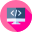 **TODO!** Create some functions that handle hashtags (`#ensae`), URLs (`http:...`) and HTML tags (`<div></div>`).
We suggest that you mainly use the `TweetTokenizer` output as an input for these functions.

In [ ]:
def remove_hashtags(tokens):
  # code me!
  return #???

def remove_url(tokens):
  # code me!
  return #???

def remove_html(tokens):
  # code me!
  return #???

### 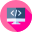 **TODO!** Implement the cleaning function 

Now let's implement our cleaning function that will make use of the three previous small functions.



In [ ]:
from tqdm import tqdm
def tokenize_url_hashtags(corpus):
  # code me!

### 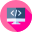 **TODO!** Use the cleaning function for each dataset (pol, eco, movie)

In [ ]:
# code me!

### 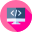 **TODO!** Consider multi-word expression

Now we can design our function for multi-word expressions. 
We will have to set a threshold on their bigrams scores, depending on the corpus. 

Then, we'll first use a function that displays some expression examples depending on a threshold.

You might need [Gensim documentation for Phrases](https://radimrehurek.com/gensim/models/phrases.html) related functions.

In [ ]:
# we suggest using the Phrases module to train the multi-word detector then iterating on the output to display the results (first 15 for instance)
from gensim.models.phrases import Phrases, Phraser

## example usage for Phrases (goes inside the function): Training the multi-word expression detector
# phrases = Phrases(tokenized_sentences, threshold=threshold)

def show_phrases():
  # code me!

### 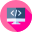 **TODO!** Use the created function on the cleaned corpora

In [ ]:
# code me!

 Threshold should go up to 90 at least. 
 

In [ ]:
# todo with threshold 90

This is much more satisfying.

### 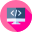 **TODO!** Do the same for each dataset while varying the threshold as you see fit!

In [ ]:
# code me!

___
# <strong><font color="chillipepper">2. Build the 3 cleaned corpuses with your cleaning function. (1 corpus = 1 list of cleaned and tokenized sentences).</font></strong>

### 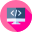 **TODO!** Create the function to clean the corpus

Create a `clean_corpus()` function that will make use of your cleaning function and gensim Phrases and Phraser functions to better clean the corpora.

In [ ]:
def clean_corpus():
  # code me!

### 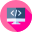 **TODO!** Apply the function

Apply this function on the corpora and then print the first elements of each cleaned corpus

In [ ]:
cleaned_pol = clean_corpus(#code me!
# code me!

In [ ]:
print(cleaned_pol[0])
print(cleaned_eco[0])
print(cleaned_movie[0])

['rt', '@nowthisnews', ':', 'rep', '.', 'trey', 'radel', '(', 'r', '-', 'fl', ')', 'slams', 'obamacare', '.']
['new_york', '--', 'yields', 'on', 'most', 'certificates', 'of', 'deposit', 'offered', 'by', 'major', 'banks', 'dropped', 'more', 'than', 'a', 'tenth', 'of', 'a', 'percentage_point', 'in', 'the', 'latest', 'week', ',', 'reflecting', 'the', 'overall', 'decline', 'in', 'short-term', 'interest_rates.', '<', '/br', '>', '<', '/br', '>', 'on', 'small-denomination', ',', 'or', '``', 'consumer', ',', "''", 'cds', 'sold', 'directly', 'by', 'banks', ',', 'the', 'average', 'yield', 'on', 'six-month', 'deposits', 'fell', 'to', '5.49', '%', 'from', '5.62', '%', 'in', 'the', 'week', 'ended', 'yesterday', ',', 'according', 'to', 'an', '18-bank', 'survey', 'by', 'banxquote', 'money', 'markets', ',', 'a', 'wilmington', ',', 'del.', ',', 'information', 'service.', '<', '/br', '>', '<', '/br', '>', 'on', 'three-month', '``', 'consumer', "''", 'deposits', ',', 'the', 'average', 'yield', 'sank', '

#### Some highlights from the multi-word expression detectors:
- Please_join is assumed to be a multiword expression in the tweet corpus
- New_york has been correctly merged
- led_by has been detected as a multiword expression in the movie review corpus


___
# <strong><font color="chillipepper">3. TF-IDF based Search Engine</font></strong>


### 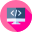 **TODO!** Create a search engine for movie titles, based on a textual description of their plot.

We want to use a very famous textual vectorization method: [TF-IDF](https://en.wikipedia.org/wiki/Tf%E2%80%93idf), TermFrequency-InverseDocumentFrequency.


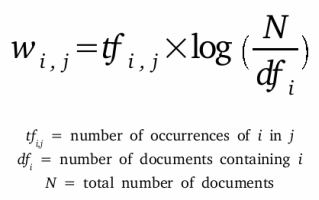

Tips:
- https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html
- you may need the `fit_transform()`and `transform()` methods of the tfidf vectorizer
- https://numpy.org/doc/stable/reference/generated/numpy.argsort.html
- https://numpy.org/doc/stable/reference/generated/numpy.flip.html

In [ ]:
! wget https://gitlab.com/gguibon/ensae-ml4nlp-storage/-/raw/master/wiki_movie_plots_deduped.zip
! unzip wiki_movie_plots_deduped.zip

In [ ]:
import pandas as pd
df_wikiplots = pd.read_csv('wiki_movie_plots_deduped.csv')

In [ ]:
df_wikiplots.head()

,Release Year,Title,Origin/Ethnicity,Director,Cast,Genre,Wiki Page,Plot,lowerplot
0,1901,Kansas Saloon Smashers,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Kansas_Saloon_Sm...,"A bartender is working at a saloon, serving dr...","a bartender is working at a saloon, serving dr..."
1,1901,Love by the Light of the Moon,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Love_by_the_Ligh...,"The moon, painted with a smiling face hangs ov...","the moon, painted with a smiling face hangs ov..."
2,1901,The Martyred Presidents,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/The_Martyred_Pre...,"The film, just over a minute long, is composed...","the film, just over a minute long, is composed..."
3,1901,"Terrible Teddy, the Grizzly King",American,Unknown,NaN,unknown,"https://en.wikipedia.org/wiki/Terrible_Teddy,_...",Lasting just 61 seconds and consisting of two ...,lasting just 61 seconds and consisting of two ...
4,1902,Jack and the Beanstalk,American,"George S. Fleming, Edwin S. Porter",NaN,unknown,https://en.wikipedia.org/wiki/Jack_and_the_Bea...,The earliest known adaptation of the classic f...,the earliest known adaptation of the classic f...


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
# code me!

In [ ]:
query = "61 seconds"
query_vec = # code me!
results = # code me using cosine similarity

In [ ]:
# we need to flatten the vector in order to use np.argsort and get the n top candidates
# then reverse the array on dim 0
# code me!

In [ ]:
# print the top 5 candidates for query "61 seconds"

Terrible Teddy, the Grizzly King
The Martyred Presidents
Cas & Dylan
The Slugger's Wife
8 Seconds


### 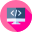 **TODO!** Create a function `search_engine_movie()` that will interactively get an `input()` from the user and return the first five candidates.

In [ ]:
from termcolor import colored

def search_engine_movie():
  query = input('Welcome to the search engine.\nEnter some keywords or type "exit" to stop the engine:')
  while query != "exit":
    # code me!

In [ ]:
search_engine_movie()

Welcome to the search engine.
Enter some keywords or type "exit" to stop the engine:star wars
The Curse of the Wraydons
American Honey
Nobita Drifts in the Universe
The Adventures of Gerard
Patricia Gets Her Man
Enter some keywords:exit


### 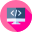 **TODO!** Change the tf-idf model to a more "complete" version by also integrating titles. And then adapt the `search_engine_movie()` function.

In [ ]:
# code me!
def search_engine_movie(scope="title"):
  '''
  Args:
    scope (str): either 'title', 'plot' or 'complete'
  '''
  # code me!

In [ ]:
search_engine_movie(scope="title")

Initializing, please wait...
Welcome to the complete search engine.
Enter some keywords or type "exit" to stop the engine:in a galaxy far far away, some jedi look for the force
Far and Away
The Far Country
Sunday Too Far Away
Far North
Far East
Enter some keywords:star wars
Star Wars: The Clone Wars
Star Wars Episode IV: A New Hope (aka Star Wars)
The Wars
Star Wars: The Last Jedi
Star Wars: The Force Unleashed
Enter some keywords:exit


As you can see, our search engine would require more textual data than simple plot descriptions, or to change the textual representation (tokenization, other embedding method).

In the following part we will focus on another and more recent text representation.

___
# <strong><font color="chillipepper">4. Train a Word2Vec model with Gensim for the 3 corpuses, and explore the most similar words to "man", "woman", "politician', etc. for the corpora.</font></strong>


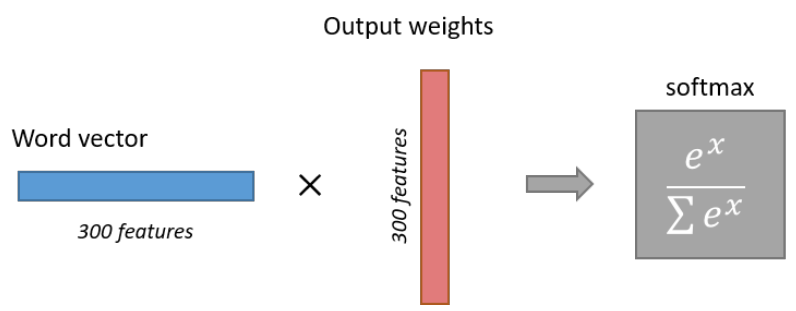

Gensim is a library that contains implementations of various embedding algorithms. Among them, the Word2Vec is available with the following documentation: https://radimrehurek.com/gensim/models/word2vec.html 

### 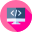 **TODO!** Use this to train Word2Vec models for each corpus and save the resulting embeddings into variables.

*Training might take a few seconds or one minute*

In [ ]:
from gensim.models import Word2Vec
from multiprocessing import cpu_count

cpu = cpu_count()
print('The virtual instance has {} cpus, that will be used to train the word2vec model'.format(cpu))

# code me!

### 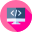 **TODO!** Get closest pairs 

Once the training is over, explore the closest pairs of words for each corpus.
We suggest you create a function for this and make use of:
```python
wv.most_similar(word, topn=10)
```

In [ ]:
domains = ['politics', 'economics', 'movies'] # movies refer to the defined 'df_movie' variable at the beginning of the lab
def closest_to():
  # code me!

In [ ]:
closest_to('man')
print('========================================================================')
closest_to('woman')
print('========================================================================')
closest_to('politicians')
print('========================================================================')
closest_to('scenario')
print('========================================================================')
closest_to('join')

The twitter database doesn't seem to give coherent similarities. 

The economics and movies databases have interesting biaises, a rich embeddings. 

___
# <strong><font color="chillipepper">5. Export the embeddings as two .tsv files to use projector.tensorflow.org interactive visualisation.</font></strong>



### 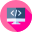 **TODO!** Save the embeddings as TSV files 
These embeddings need to be saved on the disk. You will have to create a function `save_embeddings()` that will iterate over each model vocabulary `model.wv.vocab` and vectors `model.wv[text_word_as_a_key]`

Afterward, please use this function for the three corpora: pol, eco, movies

In [ ]:
import os 

def save_embeddings(model, name):
    # code me!

In [ ]:
# apply the function for each corpus

### 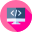 **TODO!** Upload them to the projector
 
Now that the TSV files are made, you can upload them and explore the embeddings on this website: https://projector.tensorflow.org to obtain a result similar to this.

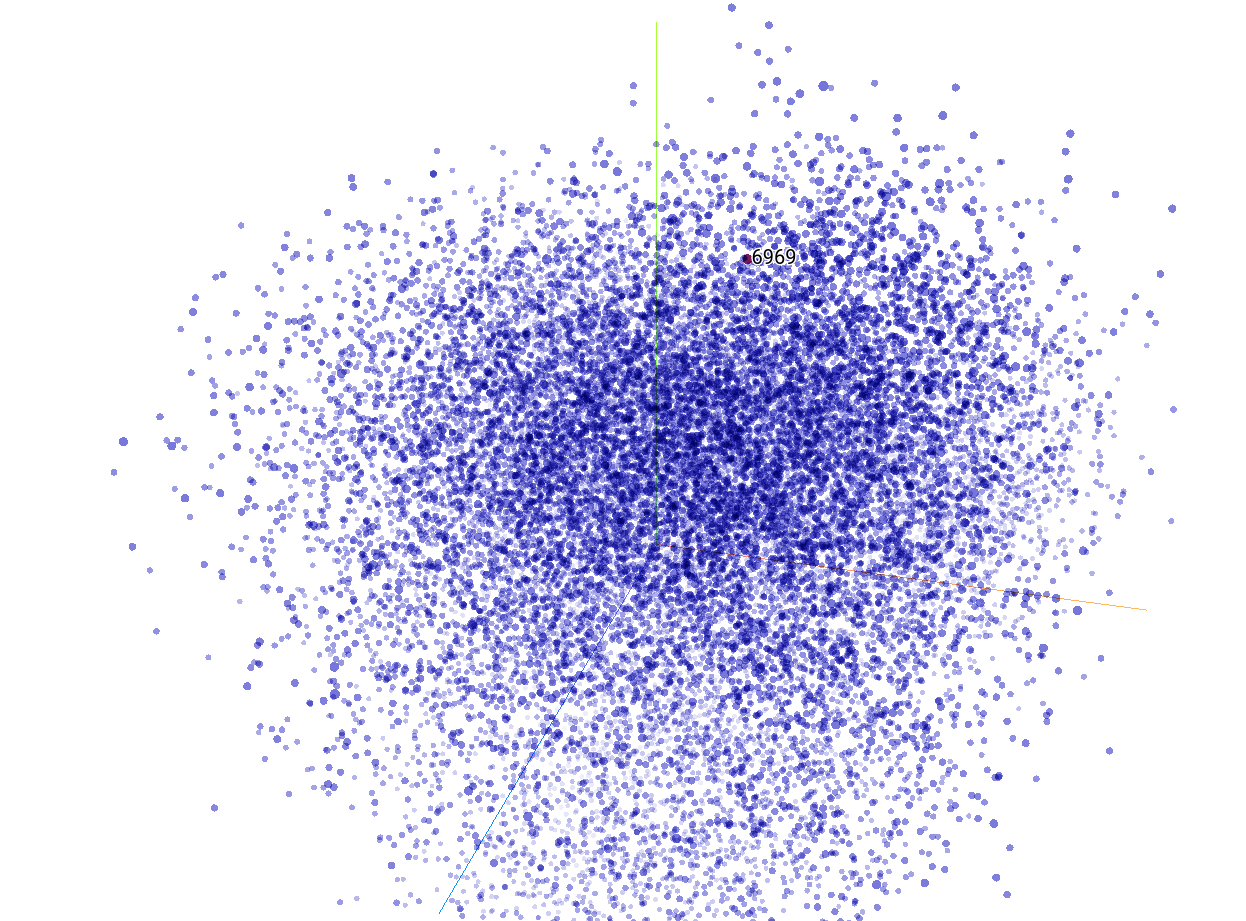

___
# <strong><font color="chillipepper">6. Write an evaluation function that computes the correlation coefficient between human-rated similarity and Word2Vec's cosine similarity</font></strong>


## The word relatedness MTURK-771 test collection

Download a new file from MTURK (mechanical turk).

More details about this dataset can be found here: https://www2.mta.ac.il/~gideon/datasets/mturk_771.html

In [ ]:
! wget --no-check-certificate https://www2.mta.ac.il/~gideon/datasets/MTURK-771.csv

Import the file as a pandas dataframe and see the first rows for dedicated columns just for now

In [ ]:
df_Mturk = pd.read_csv('./MTURK-771.csv', header=None)
df_Mturk.columns = ['term1', 'term2', 'sim']
df_Mturk.head()

,term1,term2,sim
0,access,gateway,3.791667
1,account,explanation,2.000000
2,account,invoice,3.750000
3,account,statement,3.681818
4,acoustic,remedy,1.227273


Note that this dataset actually contains the `df_Mturk['sim']` column which is the **human-rated similarity**!

### 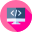 **TODO!** Create a function to get the similarity

Create a function `compute_sim()` which will return the similarity between two words from the designated word2vec model. Don't forget to handle the case where the word is not present in the model.

Then, apply this function for each trained word2vec model

In [ ]:
import numpy as np
def compute_sim(x, y, model):
  # code me!
  # you may need np.nan to return numpy NotANumber (nan)

In [ ]:
# apply the function

Take a look at the resulting pandas dataframe

In [ ]:
# you can use the output as a reference
df_Mturk.head()

,term1,term2,sim,embedding_sim_eco,embedding_sim_pol,embedding_sim_movies
0,access,gateway,3.791667,0.152508,NaN,0.175570
1,account,explanation,2.000000,0.430690,0.876688,0.222692
2,account,invoice,3.750000,NaN,NaN,NaN
3,account,statement,3.681818,-0.074676,0.645552,0.412375
4,acoustic,remedy,1.227273,NaN,NaN,-0.009123


### 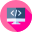 **TODO!** Plot the embedding similarities

Use seaborn and scipy's `pearsonr()` to create a function that will plot the embedding similarities.

[Seaborn documentation](https://seaborn.pydata.org/generated/seaborn.jointplot.html#seaborn.jointplot)

[Scipy Pearsonr documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html)

Here is an example of one plot we want to obtain:


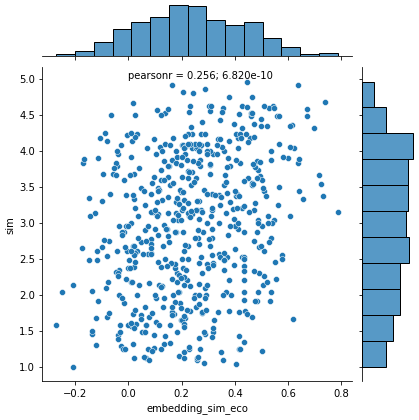

In [ ]:
import seaborn as sns
import numpy as np
from scipy.stats import pearsonr, spearmanr
%matplotlib inline

def plot_embedding_sim(target="embedding_sim_eco", dataframe=df_Mturk):
  """
  prints the plot for different embedding sim values from the pandas dataframe

  Args:
    target (str): the target field name. For instance "embedding_sim_eco", "embedding_sim_pol", "embedding_sim_movies"
    dataframe (df): the dataframe containing the data
  """
  ## code me!
  ## obtain pearson correlation and p-value using scipy function
  # pearson_correlation, p_value = pearsonr(x,y)

  ## some cues below
  ## create the figure (look at the documentation)
  # fg = sns.jointplot(.....)
  ## add custom text to the plot
  # fg = fg.ax_joint.text(0, 5, some_text)

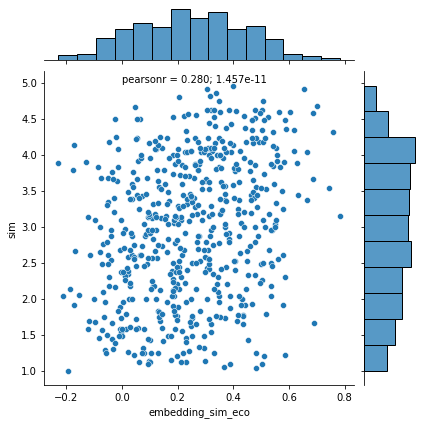

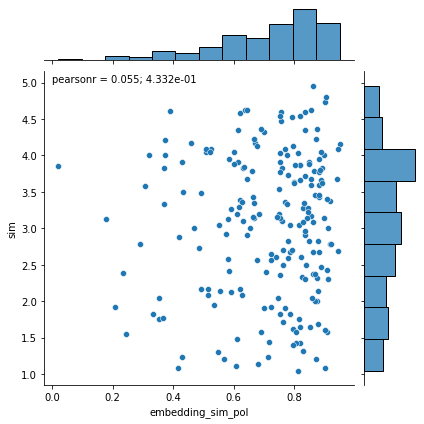

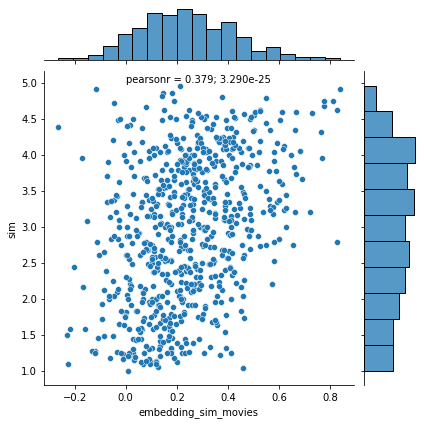

In [ ]:
plot_embedding_sim(target="embedding_sim_eco")
plot_embedding_sim(target="embedding_sim_pol")
plot_embedding_sim(target="embedding_sim_movies")


As expected, the movies embeddings performs better on the word similarity task than the economics, and politics embeddings. 

Intrinstic quality comparison is the following : 
movies > eco > pol.

This can be explained by the facts that :
- The movies corpus is the largest
- The movies corpus is the cleanest
- The economics corpus contains more domain-specific vocabulary that is not assessed by Mturk. 
- Politics and economics don't have some words that are in Mturk, and are thus not evaluated on that. 



Interested student could tune word2vec models hyperparameters to optimize the pearson coefficient, as an exercise. 